In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#upload dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stage-two/stage_2.3/Pesticide_treatment_data.txt', sep='\t')
print(df.head())

           Unnamed: 0  acetylcarnitine  aconitic_acid   adenine  \
0           WT_DMSO_1         7.000000     -19.447639 -0.066413   
1    WT_pesticide_0_1         7.035531     -19.445951 -0.363286   
2   WT_pesticide_8h_1         6.773425     -19.443194  0.048875   
3  WT_pesticide_24h_1         7.900711     -19.442015  0.195580   
4       mutant_DMSO_1         6.498987     -19.442820  0.761424   

   adenosine_cyclic_monophosphate  adenosine_monophosphate  \
0                       -1.917890                 2.967939   
1                       -1.700000                 5.340498   
2                       -1.632303                 3.705703   
3                       -2.173653                 3.278473   
4                       -3.291687                 5.197760   

   adenosine_triphosphate  adipic_acid  allantoin  alpha_ketoglutaric_acid  \
0               12.728842     1.165878   7.151822                 3.897284   
1               12.718995     1.136285   6.941596                 4.

In [5]:
# Ensure the first column is used as an index if it contains sample names
# Changed 'data' to 'df' as 'df' is the DataFrame containing the data
if "Unnamed: 0" in df.columns:
    df.rename(columns={"Unnamed: 0": "Sample"}, inplace=True)  # Rename column with 'Sample'
    df.set_index("Sample", inplace=True)  # Set sample names as the index


In [6]:
# Display dataset shape and first few rows to understand its structure
print("Dataset Shape:", df.shape) # Changed 'data' to 'df'
print("Dataset Preview:")
print(df.head()) # Changed 'data' to 'df'


Dataset Shape: (8, 108)
Dataset Preview:
                    acetylcarnitine  aconitic_acid   adenine  \
Sample                                                         
WT_DMSO_1                  7.000000     -19.447639 -0.066413   
WT_pesticide_0_1           7.035531     -19.445951 -0.363286   
WT_pesticide_8h_1          6.773425     -19.443194  0.048875   
WT_pesticide_24h_1         7.900711     -19.442015  0.195580   
mutant_DMSO_1              6.498987     -19.442820  0.761424   

                    adenosine_cyclic_monophosphate  adenosine_monophosphate  \
Sample                                                                        
WT_DMSO_1                                -1.917890                 2.967939   
WT_pesticide_0_1                         -1.700000                 5.340498   
WT_pesticide_8h_1                        -1.632303                 3.705703   
WT_pesticide_24h_1                       -2.173653                 3.278473   
mutant_DMSO_1                       

In [7]:
# Identify sample names corresponding to different treatment groups
# Changed 'data' to 'df' to refer to the DataFrame
wt_dmso_samples = [s for s in df.index if "WT_DMSO_1" in s]  # Wild-type control samples
wt_24h_samples = [s for s in df.index if "WT_pesticide_24h_1" in s]  # Wild-type treated samples (24h)
mut_dmso_samples = [s for s in df.index if "mutant_DMSO_1" in s]  # Mutant control samples
mut_24h_samples = [s for s in df.index if "mutant_pesticide_24h_1" in s]  # Mutant treated samples (24h)

In [8]:
# Ensure that the correct sample groups exist in the dataset
print(f"WT DMSO Samples: {wt_dmso_samples}")
print(f"WT 24h Samples: {wt_24h_samples}")
print(f"Mutant DMSO Samples: {mut_dmso_samples}")
print(f"Mutant 24h Samples: {mut_24h_samples}")

WT DMSO Samples: ['WT_DMSO_1']
WT 24h Samples: ['WT_pesticide_24h_1']
Mutant DMSO Samples: ['mutant_DMSO_1']
Mutant 24h Samples: ['mutant_pesticide_24h_1']


In [9]:
# Calculate mean values for each group to summarize metabolic response
# Changed 'data' to 'df' to refer to the DataFrame
wt_dmso = df.loc[wt_dmso_samples].mean()  # Mean response for WT control
wt_24h = df.loc[wt_24h_samples].mean()  # Mean response for WT after 24h pesticide treatment
mut_dmso = df.loc[mut_dmso_samples].mean()  # Mean response for Mutant control
mut_24h = df.loc[mut_24h_samples].mean()  # Mean response for Mutant after 24h pesticide treatm

In [17]:
print(f"WT DMSO Mean Response: {wt_dmso}")
print(f"WT 24h Mean Response: {wt_24h}")
print(f"Mutant DMSO Mean Response: {mut_dmso}")
print(f"Mutant 24h Mean Response: {mut_24h}")

WT DMSO Mean Response: acetylcarnitine                    7.000000
aconitic_acid                    -19.447639
adenine                           -0.066413
adenosine_cyclic_monophosphate    -1.917890
adenosine_monophosphate            2.967939
                                    ...    
valine                            12.140469
xanthine                           3.880476
xanthosine                        -0.917890
xylitol                            5.148667
xylulose_5_phosphate               7.900345
Length: 108, dtype: float64
WT 24h Mean Response: acetylcarnitine                    7.900711
aconitic_acid                    -19.442015
adenine                            0.195580
adenosine_cyclic_monophosphate    -2.173653
adenosine_monophosphate            3.278473
                                    ...    
valine                            11.546205
xanthine                           3.424606
xanthosine                        -1.058176
xylitol                            5.526786
xyl

In [18]:
# Calculate the difference in metabolic response (ΔM) between the DMSO treatment from the 24 hours treatment for the wild type and mutants
deltaM_WT = wt_24h - wt_dmso  # Difference between treated and control for WT
deltaM_Mutant = mut_24h - mut_dmso  # Difference between treated and control for Mutant

In [19]:
# Create a DataFrame for visualization
df = pd.DataFrame({
    'Metabolite': df.columns,  # Changed 'data' to 'df' to refer to the DataFrame
    'ΔM_WT': deltaM_WT.values,  # Change in metabolic response for WT
    'ΔM_Mutant': deltaM_Mutant.values  # Change in metabolic response for Mutant
})

<Axes: xlabel='ΔM_WT', ylabel='ΔM_Mutant'>

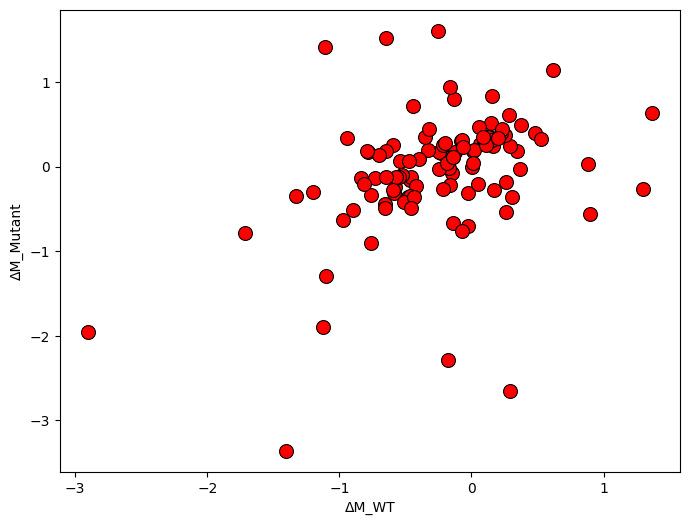

In [21]:
# Generate scatter plot to compare metabolic changes between WT and Mutants
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ΔM_WT', y='ΔM_Mutant', data=df, s=100, color='red', edgecolor='k')

In [22]:
# Calculate min and max values for a reference y=x line
max_val = max(df['ΔM_WT'].max(), df['ΔM_Mutant'].max())
min_val = min(df['ΔM_WT'].min(), df['ΔM_Mutant'].min())

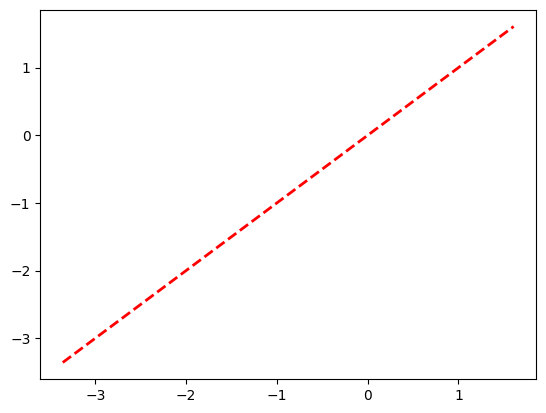

In [23]:
# Add reference line (y=x) to show equal metabolic response in WT and Mutant
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

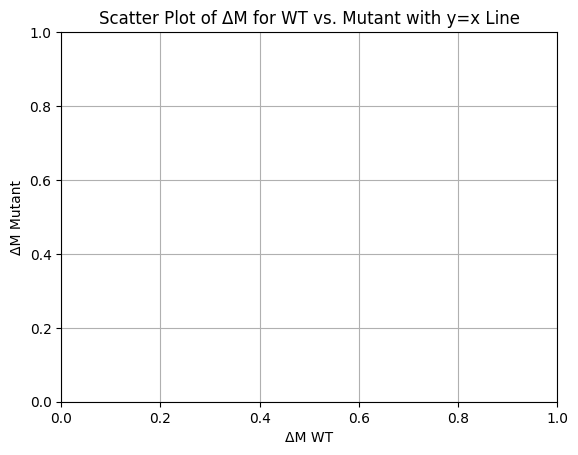

In [24]:
# Label axes and add a title
plt.xlabel('ΔM WT')
plt.ylabel('ΔM Mutant')
plt.title('Scatter Plot of ΔM for WT vs. Mutant with y=x Line')
plt.grid(True)

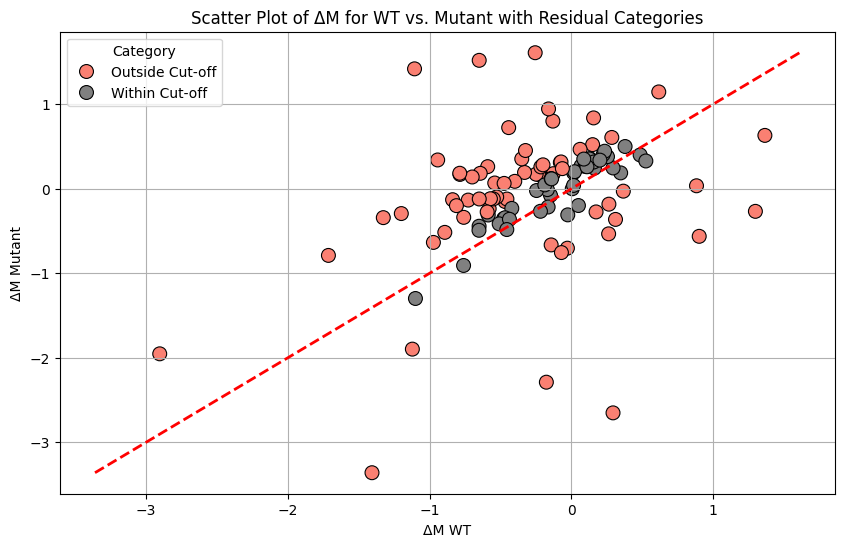

In [25]:
# Calculate residuals
df['Residual'] = df['ΔM_Mutant'] - df['ΔM_WT']

# Define residual cut-off
cut_off = 0.3

# Categorize metabolites based on residuals
df['Category'] = np.where(df['Residual'].abs() <= cut_off, 'Within Cut-off', 'Outside Cut-off')

# Scatter plot with color-coded categories
plt.figure(figsize=(10, 6))
palette = {'Within Cut-off': 'grey', 'Outside Cut-off': 'salmon'}
sns.scatterplot(x='ΔM_WT', y='ΔM_Mutant', data=df, hue='Category', palette=palette, s=100, edgecolor='k')

# Plot y=x line
plt.plot([min_val, max_val], [min_val, max_val], 'r--', linewidth=2)

plt.xlabel('ΔM WT')
plt.ylabel('ΔM Mutant')
plt.title('Scatter Plot of ΔM for WT vs. Mutant with Residual Categories')
plt.legend(title='Category')
plt.grid(True)
plt.show()

In [29]:
# Identify metabolites outside the cutoff
original_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stage-two/stage_2.3/Pesticide_treatment_data.txt', sep='\t') # Reload the original data to original_df
if "Unnamed: 0" in original_df.columns:
    original_df.rename(columns={"Unnamed: 0": "Sample"}, inplace=True)  # Rename column for clarity
    original_df.set_index("Sample", inplace=True)  # Set sample names as the index
df['Category'] = np.where(df['Residual'].abs() <= cut_off, 'Within Cut-off', 'Outside Cut-off')
outliers = df[df['Category'] == 'Outside Cut-off']

# Select 6 metabolites outside the cutoff
selected = outliers.sample(min(6, len(outliers)), random_state=42)  # Ensure sample size does not exceed available outliers


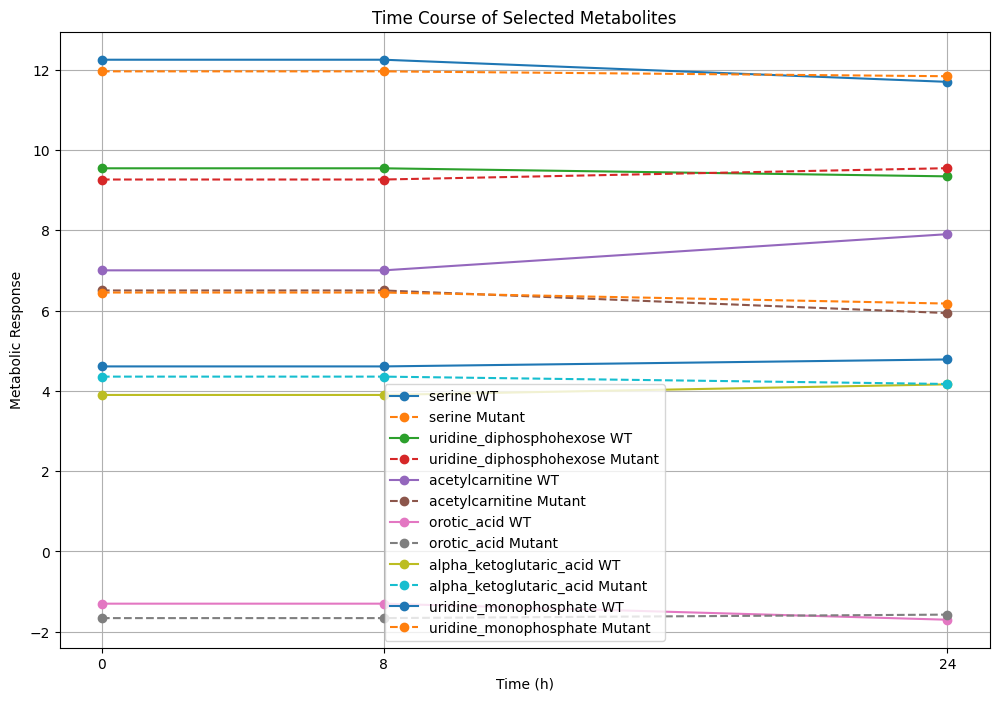

In [30]:
# Generate line plots for each selected metabolite
plt.figure(figsize=(12, 8))
for _, row in selected.iterrows():
    metabolite = row['Metabolite']

     # Extract metabolite values over time for WT and Mutant groups
    wt_0h = original_df.loc[wt_dmso_samples, metabolite].mean()  # WT DMSO 0h  # Use original_df for metabolite data
    wt_8h = original_df.loc[wt_dmso_samples, metabolite].mean()  # WT DMSO 8h  # Use original_df for metabolite data
    wt_24h = original_df.loc[wt_24h_samples, metabolite].mean()  # WT 24h  # Use original_df for metabolite data
    mut_0h = original_df.loc[mut_dmso_samples, metabolite].mean()  # Mutant DMSO 0h  # Use original_df for metabolite data
    mut_8h = original_df.loc[mut_dmso_samples, metabolite].mean()  # Mutant DMSO 8h  # Use original_df for metabolite data
    mut_24h = original_df.loc[mut_24h_samples, metabolite].mean()  # Mutant 24h  # Use original_df for metabolite data


    time_points = [0, 8, 24]
    wt_values = [wt_0h, wt_8h, wt_24h]
    mut_values = [mut_0h, mut_8h, mut_24h]

    # Plot time-course data for each metabolite
    plt.plot(time_points, wt_values, marker='o', label=f'{metabolite} WT', linestyle='-')
    plt.plot(time_points, mut_values, marker='o', label=f'{metabolite} Mutant', linestyle='--')

plt.xlabel('Time (h)')
plt.ylabel('Metabolic Response')
plt.title('Time Course of Selected Metabolites')
plt.xticks(time_points)
plt.legend(np.left_shift)
plt.grid()
plt.show()

In [ ]:
# Observations:
# - The scatter plot shows the overall metabolic response changes between WT and Mutant.
# - The y=x reference line helps visualize whether mutations increased or decreased metabolic responses.
# - Metabolites with large residuals (highlighted in salmon) deviate significantly from expected trends.
# - The time-course plot shows the metabolic progression over time, helping analyze how these metabolites behave differently in Mutants vs. WT.
# - Some metabolites show increased responses in Mutants, while others decrease, indicating possible metabolic adaptations.


#Github
#https://github.com/esewhyte/
#https://github.com/Bboy010/